In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('./preprocess/filter3.csv')
df.head()
print(df.describe())

       Unnamed: 0.1    Unnamed: 0         Likes        Shares      Comments
count  45992.000000  45992.000000  45992.000000  45992.000000  45992.000000
mean   23534.985715  25442.183793      8.470604      0.408615      2.837907
std    13677.416353  15059.220781     13.716797      1.765527      5.702824
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%    11690.750000  12274.750000      1.000000      0.000000      0.000000
50%    23364.500000  24910.500000      4.000000      0.000000      1.000000
75%    35384.250000  38774.250000     10.000000      0.000000      3.000000
max    47600.000000  51769.000000    549.000000     86.000000    147.000000


In [6]:
!pip install thefuzz

In [21]:
file_path = './preprocess/language.txt'
keyword_list = []
with open(file_path, 'r') as file:
    for line in file:
        word = line.strip(':\n')  # Remove leading/trailing whitespaces and newline characters
        keyword_list.append(word)

print(keyword_list)

['php', 'php engineer', 'PHP Developer', 'java', 'Java Developer', 'java engineer', 'Spring', 'javascript', 'javascript engineer', 'JS Developer', 'Typescript', 'AI Engineer', 'AI Developer', 'Dầu Nhật', 'Dầu Nhật Bản', 'Người gõ máy', 'Người gõ máy tính', 'Nodejs', 'Nodejs Developer', 'Nodejs Engineer', 'BrSE', 'MIDDLE BRSE', 'SENIOR BRSE', 'Brse PM', 'Brse TL', 'C#', '.NET', 'C# Developer', 'C# Engineer', 'C++', 'C++ Developer', 'C++ Engineer', 'Middle/Senior C++', 'network', 'automation test', 'Automation Tester', 'frontend', 'html', 'css', 'html/css', 'html/css/javascript', 'UI/UX', 'UI/UX DESIGNER', 'RUBY', 'SENIOR BACKEND RUBY', 'BACKEND RUBY', '']


In [9]:
from thefuzz import fuzz
from thefuzz import process

text = """
We are hiring for a Java Engineer with experience in JavaScript and PHP. If you are a talented developer proficient in PHP, Java, and JavaScript, apply now! We also have an opening for a JS Developer.
"""

keywords = ['php', 'java', 'javascript', 'java engineer', 'javascript engineer', 'php engineer', 'JS Developer']

matched_keywords = []

for keyword in keywords:
    if fuzz.partial_ratio(keyword, text.lower()) >= 75:  # Adjust the threshold as needed
        matched_keywords.append(keyword)

print(matched_keywords)


['JS Developer']


In [22]:
def get_matched_keywords(text, keywords, threshold=75):
    matched_keywords = []
    for keyword in keywords:
        if fuzz.partial_ratio(keyword, text.lower()) >= threshold:
            matched_keywords.append(keyword)
    return matched_keywords

df['Keyword'] = df['Message'].apply(get_matched_keywords, args=(keyword_list, 75))

In [23]:
df['Keyword'].to_csv('./preprocess/keyword.csv', index=True, header=True)

In [24]:
# Count the occurrences of each skill
skills_counts = df['Keyword'].explode().value_counts()
print(skills_counts[:10])

java                   9009
frontend               3265
Nodejs                 2458
C# Developer           2418
JS Developer           2389
AI Developer           2389
javascript             2388
php                    1759
html/css/javascript     825
html/css                785
Name: Keyword, dtype: int64


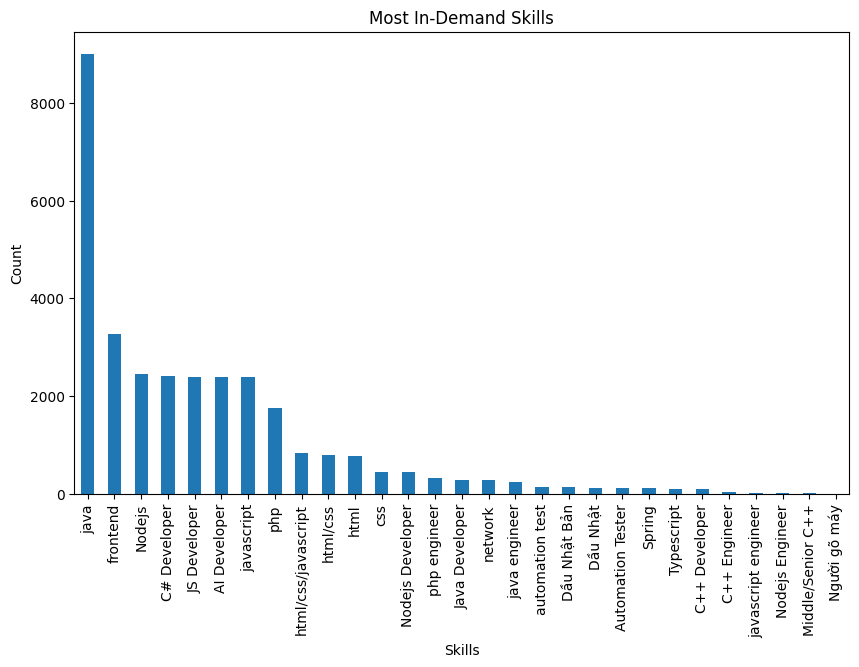

In [25]:
import matplotlib.pyplot as plt
# Plotting the skills count
plt.figure(figsize=(10, 6))
skills_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Most In-Demand Skills')
plt.show()

In [26]:
print(df.loc[795:800])

     Unnamed: 0.1  Unnamed: 0           Create time  \
795           803         834  30 May 2023 15:26:30   
796           804         835  30 May 2023 15:20:30   
797           805         836  30 May 2023 15:15:10   
798           806         837   30 May 2023 15:8:37   
799           807         838  30 May 2023 14:52:35   
800           808         839  30 May 2023 14:52:20   

                                              Actor Id     Actor Name  \
795  pfbid02tAdXjtyV95D8ix1JMpXr2G7YvyfhD7o1AEKuRdw...        HL Pham   
796  pfbid02qzvt8dGtaxr33ApHSxXjGU8guLAxWUDzc92Tazf...       Bảo Trân   
797  pfbid0gXvzF38172NHdjio1ytJjCQPajfe98LJZ3LhyyGh...  Dương Anh Thư   
798  pfbid0U5WLzPYqwQV3cR7RdFt8ygG8P34JUWkhUX1tGgji...    Phương Thảo   
799  pfbid035qjV8SLB2qdze1gcXCtJvgx2ma6zt1EaZSWBzjp...      ディプロ ベトナム   
800  pfbid02TA6TKFGfnB6h7jX9yuFvGqZwfcfxYnFCxMvAh5X...    Tuyết Trinh   

                                               Message   Type  Likes  Shares  \
795  Môi trường làm vi

In [28]:
subset_df = df[['Message', 'Keyword']].loc[2069:2075]
print('subset_df', subset_df)

subset_df                                                 Message     Keyword
2069  Nếu bạn chưa đủ gang gang skrtt để casting Gáp...          []
2070  # *Khu vực **Hà Nội/Đà Nẵng** cần tìm **Fullst...    [Nodejs]
2071  📍 Hải Châu, Đà Nẵng\n\n**====SENIOR BACKEND (N...    [Nodejs]
2072  ‼️ Hé lộ 09 vị trí hot nhất tại #Fsoft ‼️\nTro...      [java]
2073  [Đà Nẵng] Tuyển dụng .Net từ 2 năm KN upto 45M...          []
2074  > Xin được phép tiết lộ ước mơ gớt nước mắt củ...  [frontend]
2075  𝐅𝐏𝐓 𝐒𝐨𝐟𝐭𝐰𝐚𝐫𝐞 Đà Nẵng\n\nGAM.ESE  -  Đơn vị chu...          []


In [29]:
subset_df.to_csv('./preprocess/output.csv', index=True, header=True)